# Capstone Notebook

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import os
import numpy as np
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
%matplotlib inline
warnings.filterwarnings("ignore")


### As a note: I simply renamed 2 folders that had unpopular names for the plants. 'Eggplant' was in the original dataset as 'Brinjal' and 'Pepper' was in as 'Capsicum'. The rest of the original data is unaltered at this point.

In [2]:
# create a list of our classes of images
classes = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Broccoli', 'Cabbage',  'Carrot', 'Cauliflower', 'Cucumber', 'Eggplant', 'Papaya', 'Pepper', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# create labels for them
class_labels = {name:i for i, name in enumerate(classes)}

num_classes = len(classes)

image_size = (180, 180)


In [3]:
# function for loading our data

def load():
    directory = 'imgs'
    categories = ['train', 'test']
    
    output = []
    
    for category in categories:
        path = os.path.join(directory, category)
        print(f"Loading images at {path}...")
        images = []
        labels = []
        
        for file in os.listdir(path):
            label = class_labels[file]
            
            #iterating through each image
            for image in os.listdir(os.path.join(path, file)):
                
                #get the path name of each image
                image_path = os.path.join(os.path.join(path, file), image)
                
                #open and then resize with our parameter set earlier
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size)
                
                #append labels and images
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        output.append((images, labels))
   
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load()

Loading images at imgs\train...
Loading images at imgs\test...


In [5]:
def show_examples(classes, images, labels):
    
    # shuffle our data to show random examples
    images_shuff, labels_shuff = shuffle(images, labels, random_state=99)
    
    # show 5 images from our array with a label
    for i in range(5):
        plt.subplots()
        plt.xticks([])
        plt.yticks([])
        image = cv2.resize(images_shuff[i], (image_size))
        plt.imshow(image.astype(np.uint8))
        plt.xlabel(classes[labels_shuff[i]])
    plt.show()

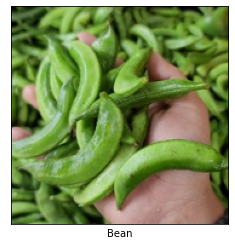

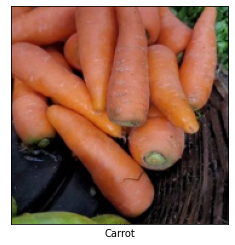

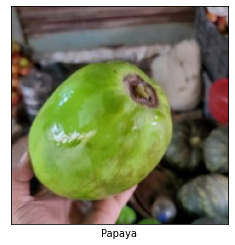

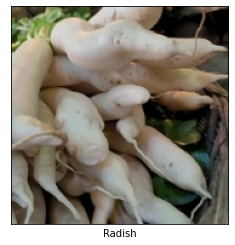

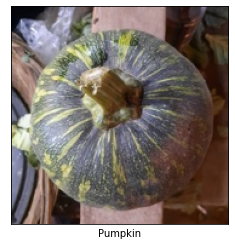

In [6]:
show_examples(classes, train_images, train_labels)

In [7]:
# creating a base model
# these are just random layers I picked to try out for this test

base_test_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation=tf.nn.relu)
])

In [8]:
#compiling our base model
base_test_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [9]:
# fitting and running our CNN
base_test_1_fit = base_test_1.fit(train_images, train_labels, batch_size=32, epochs=1, validation_split=0.2)

375/375 [==============================] - 65s 174ms/step - loss: 13.7647 - accuracy: 0.0822 - val_loss: 17.5042 - val_accuracy: 0.0000e+00


around 8% accuracy for our base. not too great but it is just that - a base model. let's add more complexity to our CNN.

In [10]:
# trying some new layers to try and improve model accuracy
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.softmax)
])

In [11]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_1_fit = model_1.fit(train_images, train_labels, batch_size=32, epochs=3, validation_split=0.2)

Epoch 1/3
375/375 [==============================] - 104s 276ms/step - loss: 21.2078 - accuracy: 0.5725 - val_loss: 67.0750 - val_accuracy: 0.0000e+00
Epoch 2/3
375/375 [==============================] - 104s 277ms/step - loss: 0.4149 - accuracy: 0.8817 - val_loss: 94.4462 - val_accuracy: 0.0000e+00
Epoch 3/3
375/375 [==============================] - 105s 280ms/step - loss: 0.1955 - accuracy: 0.9442 - val_loss: 113.2940 - val_accuracy: 0.0000e+00


94% is solid! let's try adding more complexity.

In [13]:
# adding EVEN MORE LAYERS
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.softmax)
])

In [14]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_2_fit = model_2.fit(train_images, train_labels, batch_size=32, epochs=3, validation_split=0.2)

Epoch 1/3
375/375 [==============================] - 111s 297ms/step - loss: 14.2095 - accuracy: 0.6134 - val_loss: 31.9880 - val_accuracy: 0.0000e+00
Epoch 2/3
375/375 [==============================] - 121s 322ms/step - loss: 0.3504 - accuracy: 0.8992 - val_loss: 34.5131 - val_accuracy: 0.0000e+00
Epoch 3/3
375/375 [==============================] - 109s 290ms/step - loss: 0.1304 - accuracy: 0.9632 - val_loss: 35.1942 - val_accuracy: 0.0000e+00


In [16]:
# you guessed it
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.softmax)
])

In [17]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model_3_fit = model_3.fit(train_images, train_labels, batch_size=32, epochs=3, validation_split=0.2)

Epoch 1/3
375/375 [==============================] - 102s 273ms/step - loss: 1.1722 - accuracy: 0.6447 - val_loss: 22.2161 - val_accuracy: 0.0000e+00
Epoch 2/3
375/375 [==============================] - 109s 292ms/step - loss: 0.3895 - accuracy: 0.8779 - val_loss: 19.9111 - val_accuracy: 0.0000e+00
Epoch 3/3
375/375 [==============================] - 104s 277ms/step - loss: 0.2139 - accuracy: 0.9323 - val_loss: 25.8084 - val_accuracy: 0.0000e+00


As we can see, more complexity appears to help up until a certain point. Model 2 has the best performance, but let's try to run it with more epochs and see if we can push towards 99% accuracy.

In [19]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.softmax)
])

In [20]:
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model_4_fit = model_4.fit(train_images, train_labels, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 108s 288ms/step - loss: 5.4701 - accuracy: 0.5832 - val_loss: 27.3658 - val_accuracy: 0.0000e+00
Epoch 2/5
375/375 [==============================] - 112s 300ms/step - loss: 0.5183 - accuracy: 0.8604 - val_loss: 32.8934 - val_accuracy: 0.0000e+00
Epoch 3/5
375/375 [==============================] - 112s 299ms/step - loss: 0.2395 - accuracy: 0.9297 - val_loss: 39.4545 - val_accuracy: 0.0000e+00
Epoch 4/5
375/375 [==============================] - 108s 287ms/step - loss: 0.1673 - accuracy: 0.9567 - val_loss: 47.4895 - val_accuracy: 0.0000e+00
Epoch 5/5
375/375 [==============================] - 108s 289ms/step - loss: 0.0713 - accuracy: 0.9799 - val_loss: 53.4975 - val_accuracy: 0.0000e+00


98% accuracy for our model! wonderful!